# Continuous assessment, option 1: Neural signals

About 1% of the population suffers from epilepsy, making it one of the most common neurological diseases. Epilepsy is the result of pathological synchronous brain activity from a relatively large group of neurons in the brain. In some cases, this region becomes hyper-excitable, forming strong connections with other brain areas that may generate a seizure. [Electroencephalography (EEG)](https://en.wikipedia.org/wiki/Electroencephalography) allows to measure the electric potential generated by such current sources. These signals, recorded as time series, are the basis for understanding the nature of the epileptogenic zone, and therefore used by clinicians for diagnosis and treatment. With the aim of understanding the basis of EEG measurements, researchers have presented mathematical models linking macroscopic signals (as those acquired with EEG) with mesoscopic parameters. This is of great importance for understanding the basis of the disease and provide better treatments.


In this assignment, you will study some of the first models proposed in the area, conforming the basis of most models used in research today. More explicitly, you will implement a mathematical representation of the signals generated by a [cortical column](https://en.wikipedia.org/wiki/Cortical_column), which depends on [excitatory](https://en.wikipedia.org/wiki/Excitatory_synapse) and [inhibitory](https://en.wikipedia.org/wiki/Inhibitory_postsynaptic_potential) signals in the activated [pyramidal cells](https://en.wikipedia.org/wiki/Pyramidal_cell). The first two exercises will prepare the grounds for understanding and simulating the so called _"lumped parameter model"_ , introduced by Jensen and Rit in 1995 (paper available [here](https://link.springer.com/article/10.1007/BF00199471)).

---

***1.*** Given a linear second order initial value problem (IVP) of the form $y''(t)=p(t)y'(t)+q(t)y(t)+r(t)$, with $y(t_0)=y_0$, and $y'(t_0)=y'_0$, we define its impulse response as the solution for $r(t)=\delta(t)$, with $\delta(t)$ being Dirac's delta distribution. Using the fourth order Runge - Kutta method, verify (graphically) that the impulse response for the equation 

<br />

$$
y''(t)=\alpha \beta x(t)-2\beta y'(t)-\beta^2y(t), \tag{1}
$$

<br />

is $h(t)=\alpha \beta t e^{-\beta t}$. Use $\alpha=8.5$, $\beta=100$, $t\in[0,.1]$, $y(0)=y'(0)=0$, and $r(t)=0$ for all $t$, except for $r(t=0)=6/h_t$, where $h_t$ is the step size (and the number 6 is a normalisation constant). **[20]**

<br />

***Hint***: you can use the function from lab 5, question 4.1. 

<br />

***2.*** One of the key components when dealing with neural signals is the representation of the non-linearities of the system in a simple way. In this case, we define a _Sigmoid_ function that transforms the average membrane potential of a neural population into an average fire rate. This Sigmoid is given by

<br />

$$
Sigm(v)=\frac{2e_0}{1+e^{r(v_0-v)}},
$$

<br />

where $e_0$ is half of the maximum firing rate of neurons, $v_0$ is the value of the potential for which a 50% firing rate is achieved, and $r$ is the Sigmoid's slope at $v_0$. Write a callable function in Python ```Sigmoid``` that computes the function for an arbitrary set of parameters. Plot the sigmoid function considering $v_0=6$ mV, $e_0=2.5$ s$^{-1}$, $r=0.56$ mV$^{-1}$, and $v\in [-5,20]$ (use the values in the given units). **[10]**

<br />

***3.*** In the first point we have verified that, if a signal $x(t)$ passes through a block with impulse response $h(t)$, the output $y(t)$ satisfies the ordinary differential equation (1). Now, assume that if a signal $x(t)$ passes through a Sigmoid block, the result is just $Sigm(x(t))$. Using these concepts, it is possible to show that the set of IVPs representing the cortical column model shown in the figure below are

<br />

\begin{align}
& y_0''(t)=\alpha_e \beta_e\ Sigm(y_1(t)-y_2(t))-2\beta_e y_0'(t)-\beta_e^2y_0(t),\\
& y_1''(t)=\alpha_e \beta_e \left[C_2 Sigm(C_1y_0)+p(t)\right]-2\beta_e y_1'(t)-\beta_e^2y_1(t),\\
& y_2''(t)=\alpha_i \beta_i C_4 Sigm(C_3y_0)-2\beta_i y_2'(t)-\beta_i^2y_2(t),
\end{align}

<br />

where the subindices _"e"_ and _"i"_ stand for excitatory and inhibitory, respectively, and $p(t)$ represents random brain noise.

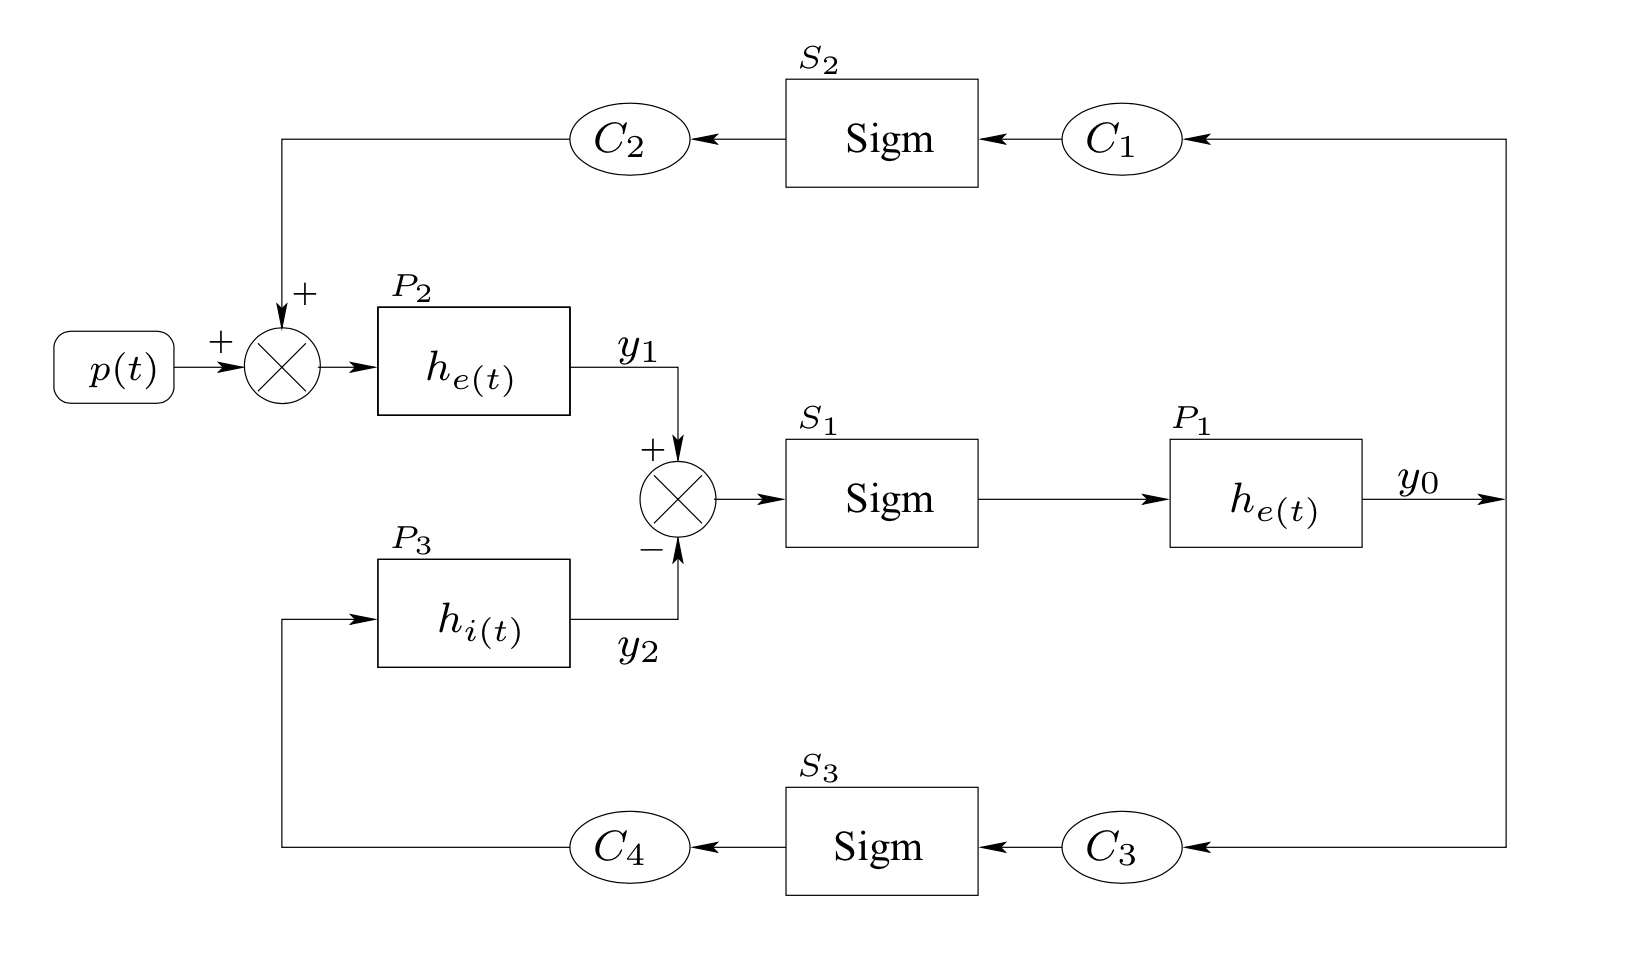

Transform the above system in a new system of six first order IVPs. **[20]**

<br />

***4.*** Use the fourth order Runge - Kutta method to solve the problem considering $\alpha_e=3.24$ mV, $\alpha_i=22$ mV, $\beta_e=100$ s$^{-1}$, $\beta_i=50$ s$^{-1}$, $C_1=C$, $C_2=0.8 C$, $C_3=C_4=0.25C$, and the parameters for the Sigmoid defined in question 2. In addition, consider all variables equal to zero at the initial time (i.e., null ICs), $t\in[0,2]$ s, and ```p = np.random.normal(90,40)``` (i.e., $p(t)$ normally distributed with mean 90 and standard deviation 40). Plot $y_1(t)-y_2(t)$ ("the output") considering $C=15,75,80,135,270,3000$ (in different subplots) and compare with the figures in Jensen's paper! **[30]**

<br />

***Hint***: Follow the procedure used in the pendulum example in Lecture 5. 

***Note***: Jensen used different values of $C$ to achieve these figures due to the different definition of $p(t)$.

<br />

***5.*** We aim to compute the running average energy, defined as

<br />

$$
r_m(t)=\int_0^t (y(\tau)-\bar{y})^2 d\tau,
$$

<br />

where $\bar{y}$ is the mean value of the overall signal. Write a callable function in Python computing this integral with the trapezium method, and use it to plot the running average energy as a function of time for the values of $C$ given in question 4. **[20]**

<br />

**Hint**: You can check for the function ```cumsum``` available in Numpy. 

# Question 1)

Following the method from tutorial 5,we have:
 $$
y''(t)=f(t,y(t),y'(t)),\ \  y(t_0)=y_0,\ \ y'(t_0)=y_0',
$$
Where,
\begin{align*}
&y'(t)=g(t),\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  y(t_0)=y_0=0,\\
&g'(t)=f(t,y(t),g(t)),\ \ \ \ \ g(t_0)=y_0'=0,
\end{align*}

With $f(t,y(t),g(t))=\alpha \beta x(t)-2\beta g(t)-\beta^2y(t)$. Using Euler's method and $h=0.1$,we get

In [55]:
def function(t,y):       #t=time, y=function  #c is the 
    
    sal = np.array([y[1],alpha*betta -2*betta*y[1] -(betta**2)*y[0]])
    return sal


def RK4(t, f, y0):
    y = np.zeros((len(t),len(y0))); y[0] = y0
    h = t[1] - t[0]
    for i in range(0, len(t)-1):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i]+h/2, y[i]+k1/2)
        k3 = h * f(t[i]+h/2, y[i]+k2/2)
        k4 = h * f(t[i]+h, y[i]+k3)        
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

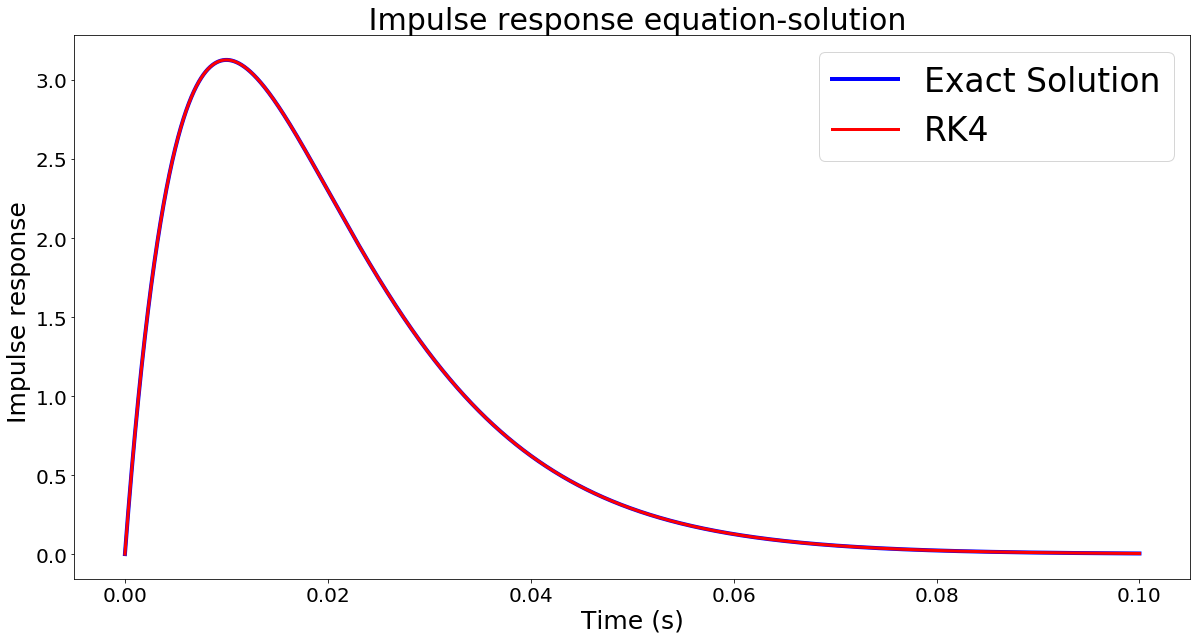

In [56]:
import numpy as np
import matplotlib.pyplot as plt

alpha=8.5   #parameter values 
betta=100   #betta values 

y0 = np.array([0, 0]) # the initial condition is an array as well
            
time=np.linspace(0,0.1,10000)

yn_e = RK4(time, function, y0)

fig, ax = plt.subplots(figsize=(20, 10))
solution=alpha*betta*time*(np.exp(-betta*time))
ax.plot(time,solution,label='Exact Solution', color='blue',linewidth=4)
ax.plot(time, yn_e[:,1],label='RK4', color='red',linewidth=3)
plt.legend(loc='best', fontsize=33)
ax.set_xlabel('Time (s)',size=25)
ax.set_ylabel('Impulse response ',size=25)
ax.set_title(' Impulse response equation-solution',size=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()


**Coment**. Rk4 has work very well.Both numerical and Analytical solution produces a very similar curve for h=0.0001 size step 

# Question 2)

In [57]:
def Sigmoid(e0,r,v0,v): #we define the sigmoid function for any arbitrary set of parameters
    sol=np.zeros(len(v))
    for i in range(0,len(v)):
        sol[i]=((2*e0)/(1+np.exp(r*(v0-v[i]))))
    return sol

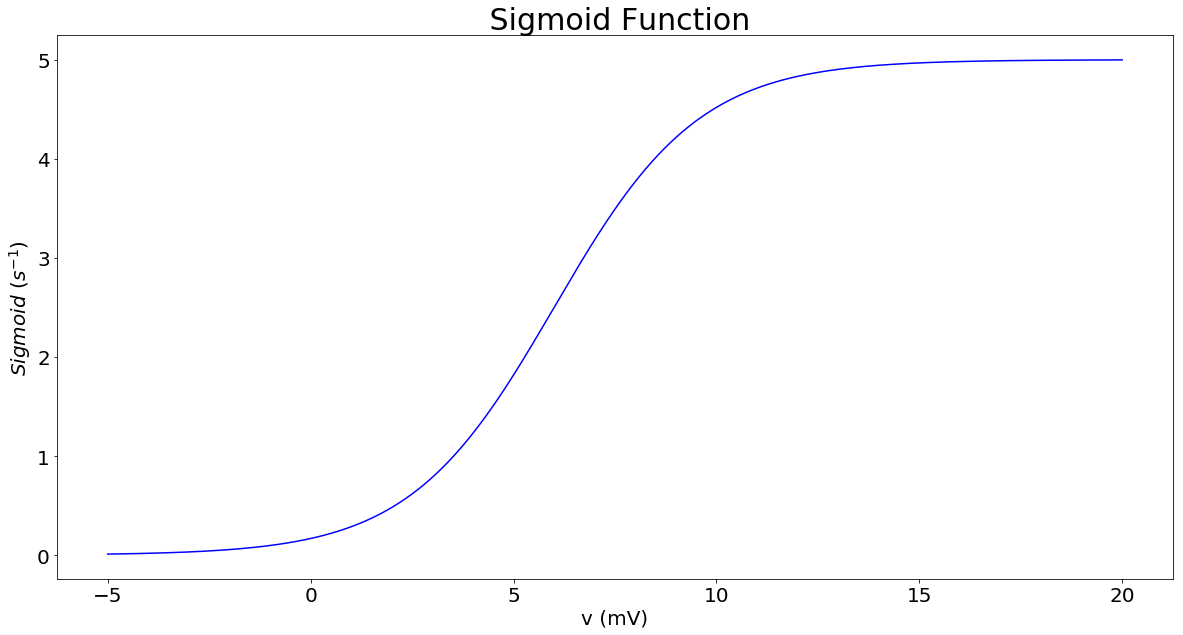

In [58]:
#We plot the sigmoid function for the following values:
v0=6
e0=2.5
r=0.56
v=np.linspace(-5,20,10000) 
sigmoid=Sigmoid(e0,r,v0,v)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(v,sigmoid,label='Sigmoid Function', color='blue')
ax.set_xlabel('v (mV)',size=20)
ax.set_ylabel(r'$ Sigmoid \ (s^{-1}) $',size=20)
ax.set_title(' Sigmoid Function',size=30)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.show()

# Question 3)

 We are going to reduce the following  system: 
 
<br />

\begin{align}
& y_0''(t)=\alpha_e \beta_e\ Sigm(y_1(t)-y_2(t))-2\beta_e y_0'(t)-\beta_e^2y_0(t),\\
& y_1''(t)=\alpha_e \beta_e \left[C_2 Sigm(C_1y_0)+p(t)\right]-2\beta_e y_1'(t)-\beta_e^2y_1(t),\\
& y_2''(t)=\alpha_i \beta_i C_4 Sigm(C_3y_0)-2\beta_i y_2'(t)-\beta_i^2y_2(t),
\end{align}

<br />

Into  a new system of six first order IVPs(Following the same procedure as Lecture 5):


\begin{align*}
&y_0'(t)=g_0(t),\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  y_0(t_0)=y_{00},\\
&g_0'(t)=f(t,y_0(t),y_1(t),y_2(t),g_0(t)),\ \ \ \ \ \ \ \ g_0(t_0)=g_{00},
\end{align*}
\begin{align*}
&y_1'(t)=g_1(t),\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  y_1(t_0)=y_{10},\\
&g_1'(t)=f(t,y_0(t),y_1(t),y_2(t),g_1(t)),\ \ \ \ \  \  \  g_1(t_0)=g_{10},
\end{align*}
\begin{align*}
&y_2'(t)=g_2(t),\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  y_2(t_0)=y_{20},\\
&g_2'(t)=f(t,y_0(t),y_1(t),y_2(t),g_2(t)),\ \ \ \ \  \  \  g_2(t_0)=g_{20},
\end{align*}

Devloping and ordering the above equations we get:

\begin{align*}
&y_0'(t)=g_0(t),\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
&y_1'(t)=g_1(t),\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
&y_2'(t)=g_2(t),\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
&g_0'(t)=f(t,y_0(t),y_1(t),y_2(t),g_0(t))=\alpha_e \beta_e\ Sigm(y_1(t)-y_2(t))-2\beta_e g_0(t)-\beta_e^2y_0(t),\ \ \ \ \  \ \ \  \  \ \ \\
&g_1'(t)=f(t,y_0(t),y_1(t),y_2(t),g_1(t))=\alpha_e \beta_e \left[C_2 Sigm(C_1y_0)+p(t)\right]-2\beta_e g_1(t)-\beta_e^2y_1(t),\ \ \ \  \ \ \ \ \ \ \ \ \\
&g_2'(t)=f(t,y_0(t),y_1(t),y_2(t),g_2(t))=\alpha_i \beta_i C_4 Sigm(C_3y_0)-2\beta_i g_2(t)-\beta_i^2y_2(t),\ \ \ \ \  \ \ \ \ \ \ \ \\
\end{align*}

With the following IC:

\begin{align*}
y_0(t_0)=y_{00},g_0(t_0)=g_{00}, y_1(t_0)=y_{10},g_1(t_0)=g_{10},y_2(t_0)=y_{20},g_2(t_0)=g_{20}
\end{align*}

# Question 4)

First,We need to create a new function for the RK4. We can Re-use the RK4 code from the question 1:

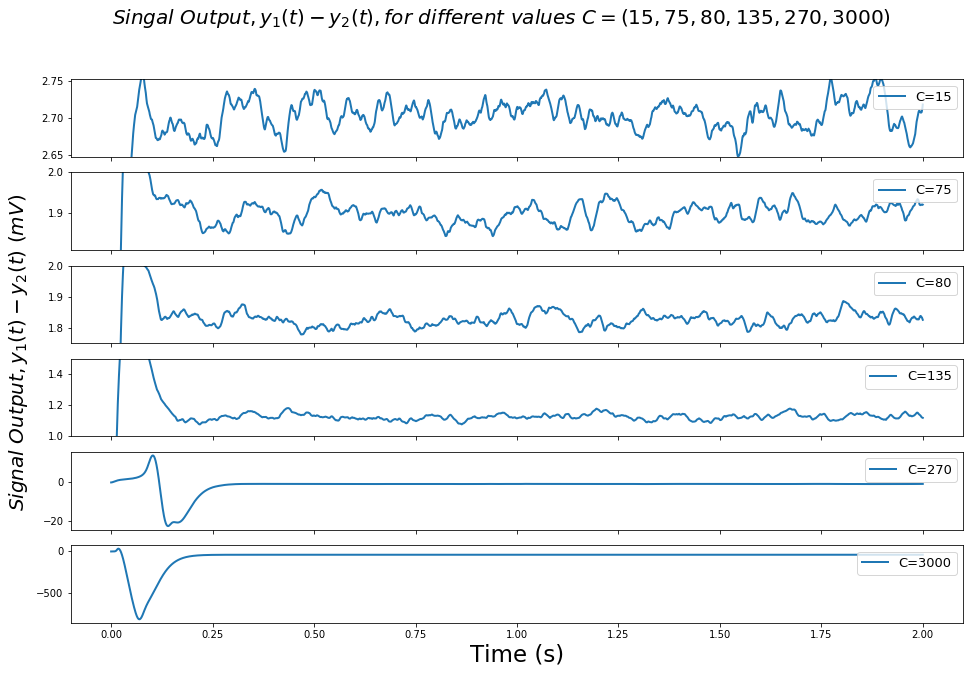

In [66]:
def Sigmoid2(e0,r,v0,v): #we define again the  sigmoid function ,but know the initial ouputs are all numbers(i.e v is not an array)
    sol=((2*e0)/(1+np.exp(r*(v0-v))))
    return sol


def RK42(t, f, y0,C):
    y = np.zeros((len(t),len(y0))); y[0] = y0
    h = t[1] - t[0]
    for i in range(0, len(t)-1):
        k1 = h * f(t[i], y[i],C)
        k2 = h * f(t[i]+h/2, y[i]+k1/2,C)
        k3 = h * f(t[i]+h/2, y[i]+k2/2,C)
        k4 = h * f(t[i]+h, y[i]+k3,C)        
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y#we define again the rk4 algorithim in order to be able to test for different values of C



def function2(t,y,C):       #We define a new function and we introduce all the six formulas above
                  #####  parameter values####
    v0=6
    e0=2.5
    r=0.56 
    alphae=3.24
    alphai=22
    bettae=100
    bettai=50
    C1=C
    C2=0.8*C
    C3=0.25*C
    C4=0.25*C
    p=np.random.normal(90,40)
    #alphae*bettae*Sigmoid2(e0,r,v0,(y[4]-y[5]))
    #alphae*bettae*(C2*Sigmoid2(e0,r,v0,(C1*y[3])) +p)
    #alphai*bettai*C4*Sigmoid2(e0,r,v0,(C3*y[3]))
    eq1=alphae*bettae*(Sigmoid2(e0,r,v0,(y[1]-y[2])))                  -2*bettae*y[3]-(bettae**2)*y[0]
    eq2=alphae*bettae*(C2*Sigmoid2(e0,r,v0,(C1*y[0])) +p)                            -2*bettae*y[4] -(bettae**2)*y[1]
    eq3=alphai*bettai*C4*(Sigmoid2(e0,r,v0,(C3*y[0]))    )            -2*bettai*y[5] -(bettai**2)*y[2]
    sal=np.array([y[3],y[4],y[5],eq1,eq2,eq3]) 
    return sal


y0 = np.array([0,0,0,0,0,0])        # the initial condition is an array as well
#C=np.array([15,75,80,135,270,3000])    #we will try with different values of C
time=np.linspace(0,2,50000)



fig, ((ax1),(ax2),(ax3),(ax4),(ax5),(ax6)) = plt.subplots(6, 1, figsize=(16,10),sharey=False,sharex=True)

yn_e15 = RK42(time, function2, y0,15)
yn_e75 = RK42(time, function2, y0,75)
yn_e80 = RK42(time, function2, y0,80)
yn_e135 = RK42(time, function2, y0,135)
yn_e270= RK42(time, function2, y0,270)
yn_e3000 = RK42(time, function2, y0,3000)

#Lets Plot  y1(t)−y2(t) ("the output") 
ax1.plot(time, yn_e15[:,1]-yn_e15[:,2], label='C=15', linewidth=2)
ax2.plot(time, yn_e75[:,1]-yn_e75[:,2], label='C=75', linewidth=2)
ax3.plot(time, yn_e80[:,1]-yn_e80[:,2], label='C=80', linewidth=2)
ax4.plot(time, yn_e135[:,1]-yn_e135[:,2], label='C=135', linewidth=2)
ax5.plot(time, yn_e270[:,1]-yn_e270[:,2], label='C=270', linewidth=2)
ax6.plot(time, yn_e3000[:,1]-yn_e3000[:,2], label='C=3000', linewidth=2)
 

ax1.set_ylim(2.648, 2.753)
ax2.set_ylim(1.81 ,2.0)
ax3.set_ylim(1.75 ,2.0)
ax4.set_ylim(1.0 ,1.50)
#plt.ylabel('s ', fontsize=13);    

ax1.legend(loc='upper right', fontsize=13)
ax2.legend(loc='upper right', fontsize=13)
ax3.legend(loc='upper right', fontsize=13)
ax4.legend(loc='upper right', fontsize=13)
ax5.legend(loc='upper right', fontsize=13)
ax6.legend(loc='upper right', fontsize=13)
plt.xlabel('Time (s)' , fontsize=23)

fig.text(0.07, 0.5, r'$ Signal \ Output, y_1(t)-y_2(t) \ (mV) $', va='center', rotation='vertical',size=20)

plt.suptitle(r'$ Singal \ Output, y_1(t)-y_2(t),for \ different \ values \ C=(15,75,80,135,270,3000)$ ', fontsize=20)
#ax1.set_xlabel('Common x-label')
#ax1.set_ylabel('y1(t)−y2(t) "the output"',size=)
#ax4.set_ylabel('y1(t)−y2(t) "the output"' ,size=20)
plt.show()

The following image has taken from Jensen's paper:

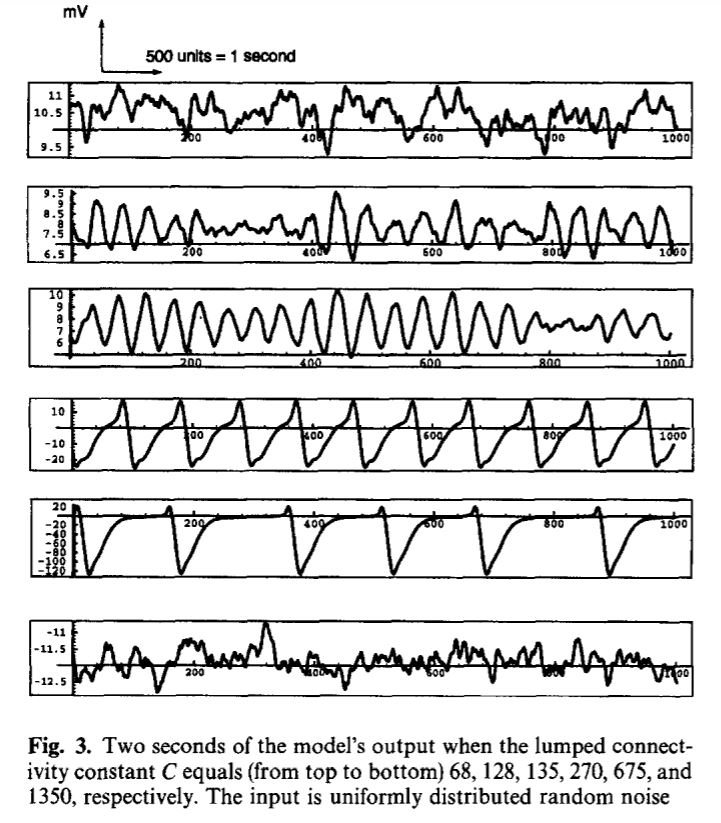

**Coment**: Before doing our analysis we have to take into account that Jensen's paper have used a different definition for p(t) and have also used  different values for C. FThe signal for the case of C = 270 and C = 675 is much more periodic, obtaining geometric patterns that are repeated in the interval t = [0,2] s However, for the rest of the values of C = 68,128,1350 the signal corresponds to noise, losing periodicity.
We can alslo observed how in the last three images(C=270,675,1350) signal output takes negatives values.

In we compare our  case with Jensen's we can see that  results are similar  for the first three smaller values of C=15,75,80,135. However for the largest values C=270,3000 we are not getting a periodic signal.There is just a big negative peak in the outpot for short times ( t<0.5 s) and then the signal get stabilized.

# Question 5)

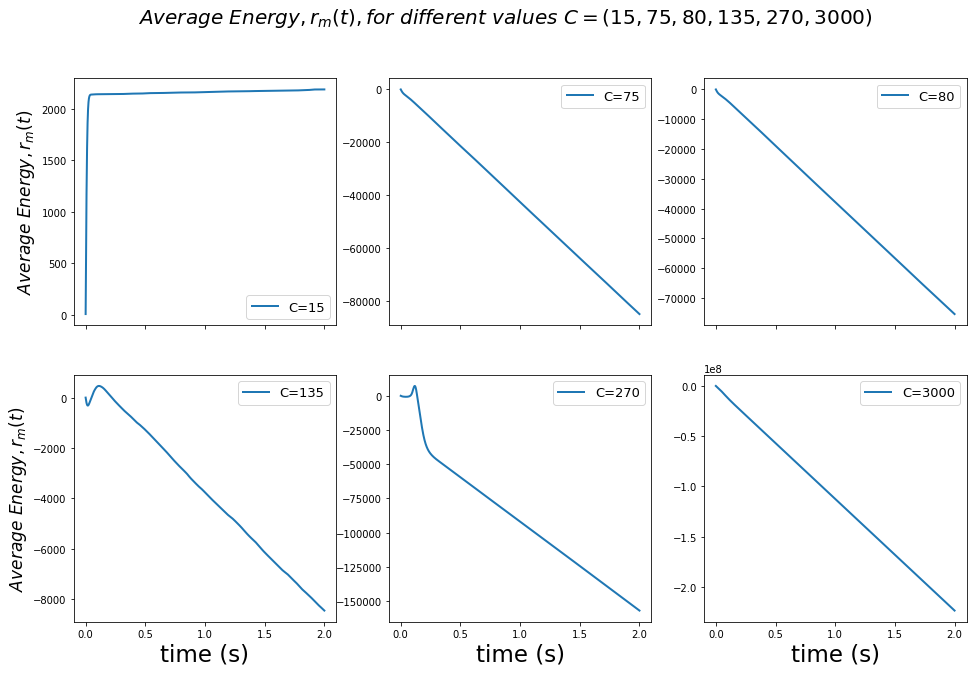

In [67]:
#Lets Plot  y1(t)−y2(t) ("the output") 



y_smooth15=(((yn_e15[:,1]-yn_e15[:,2])-np.mean(yn_e15[:,1]-yn_e15[:,2]))**2)
y_smooth75=((yn_e75[:,1]-yn_e75[:,2])-np.mean(yn_e75[:,1]-yn_e75[:,2])**2)
y_smooth80=((yn_e80[:,1]-yn_e80[:,2])-np.mean(yn_e80[:,1]-yn_e80[:,2])**2)
y_smooth135=((yn_e135[:,1]-yn_e135[:,2])-np.mean(yn_e135[:,1]-yn_e135[:,2])**2)
y_smooth270=((yn_e270[:,1]-yn_e270[:,2])-np.mean(yn_e270[:,1]-yn_e270[:,2])**2)
y_smooth3000=((yn_e3000[:,1]-yn_e3000[:,2])-np.mean(yn_e3000[:,1]-yn_e3000[:,2])**2)

#y_smoothe_15 = ( y_smooth15[0:-1] + y_smooth15[1:] ) * (.5)





y15_trapezoidal = np.cumsum(y_smooth15)
y75_trapezoidal = np.cumsum(y_smooth75)
y80_trapezoidal = np.cumsum(y_smooth80)
y135_trapezoidal = np.cumsum(y_smooth135)
y270_trapezoidal = np.cumsum(y_smooth270)
y3000_trapezoidal = np.cumsum(y_smooth3000)



###running average energy and ploting ##
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(16,10),sharex=True )

ax1.plot(time, y15_trapezoidal, label='C=15',               linewidth=2)
ax2.plot(time, y75_trapezoidal, label='C=75',               linewidth=2)
ax3.plot(time, y80_trapezoidal, label='C=80',               linewidth=2)
ax4.plot(time, y135_trapezoidal, label='C=135',             linewidth=2)
ax5.plot(time, y270_trapezoidal, label='C=270',             linewidth=2)
ax6.plot(time, y3000_trapezoidal, label='C=3000',           linewidth=2)

ax1.legend(loc='best', fontsize=13)
ax2.legend(loc='best', fontsize=13)
ax3.legend(loc='best', fontsize=13)
ax4.legend(loc='best', fontsize=13)
ax5.legend(loc='best', fontsize=13)
ax6.legend(loc='best', fontsize=13)
ax1.set_ylabel(r'$  Average \ Energy, r_m(t) \  $',fontsize=17) 
ax4.set_ylabel(r'$  Average \ Energy, r_m(t) \  $',fontsize=17) 
    
plt.suptitle(r'$ Average \ Energy, r_m(t),for \ different \ values \ C=(15,75,80,135,270,3000)$ ', fontsize=20)
ax4.set_xlabel('time (s)' , fontsize=23)
ax5.set_xlabel('time (s)' , fontsize=23)
ax6.set_xlabel('time (s)' , fontsize=23)




plt.show()

**Coment** We can observ in the subplots a linear decreasing trend (for avarage energy against the time) for all the values of C except for the C=15,where a increasing linear trend is observed.